<h1 style="text-align:center;"><b>Laboratorio 1</b></h1>
<h3 style="text-align:center;">Marcos Díaz (221102), Daniel Machic (22118), Maria Jose Ramírez (221051)</h3>

**Github**: https://github.com/MajoRC221051/Lab-1---IA

## Librerías

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans, AgglomerativeClustering
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from skimage import io
from skimage.transform import resize

# **Ejercicio 1**

In [3]:
def kmeans(X, k, max_iters=100):
    """
    X : matriz de datos (n x d)
    k : número de clusters

    Retorna:
    labels : vector de tamaño n con la clase de cada dato
    centroids : matriz k x d con los centroides
    """

    n, d = X.shape

    # Inicializar centroides aleatoriamente
    indices = np.random.choice(n, k, replace=False)
    centroids = X[indices]

    for _ in range(max_iters):

        # Paso 1: asignar cada punto al centroide más cercano
        distances = np.zeros((n, k))
        for j in range(k):
            distances[:, j] = np.linalg.norm(X - centroids[j], axis=1)

        labels = np.argmin(distances, axis=1)

        # Paso 2: recalcular centroides
        new_centroids = np.zeros((k, d))
        for j in range(k):
            new_centroids[j] = X[labels == j].mean(axis=0)

        # Verificar convergencia
        if np.allclose(centroids, new_centroids):
            break

        centroids = new_centroids

    return labels, centroids

# Ejemplo de uso
# Crear datos de ejemplo (n x d)
np.random.seed(0)
X = np.random.rand(20, 2)  # 20 puntos en R^2

labels, centroids = kmeans(X, k=3)

print("Vector de labels (n):")
print(labels)

print("\nMatriz de centroides (k x d):")
print(centroids)

Vector de labels (n):
[1 0 0 1 0 0 1 0 2 1 1 1 2 2 0 2 0 2 0 1]

Matriz de centroides (k x d):
[[0.55536705 0.47378412]
 [0.67377826 0.80915417]
 [0.1130383  0.76181579]]


# **Ejercicio 2**

### Inciso A: Dataset Iris

In [4]:
# Cargar datos
iris = load_iris()
X = iris.data

# K-Means desde cero
labels_custom, centroids_custom = kmeans(X, k=3)

# K-Means con scikit-learn
kmeans_sklearn = KMeans(n_clusters=3, random_state=42)
labels_sklearn = kmeans_sklearn.fit_predict(X)

print("Primeros 10 labels (K-Means propio):")
print(labels_custom[:10])

print("\nPrimeros 10 labels (Scikit-learn):")
print(labels_sklearn[:10])

Primeros 10 labels (K-Means propio):
[2 2 2 2 2 2 2 2 2 2]

Primeros 10 labels (Scikit-learn):
[1 1 1 1 1 1 1 1 1 1]


Para el conjunto de datos Iris se utilizó k = 3, de acuerdo con el número de clases presentes en el dataset. Los resultados muestran que tanto el algoritmo de K-Means implementado desde cero como la implementación de Scikit-learn asignan consistentemente las primeras observaciones a un mismo cluster. Las diferencias observadas en los valores numéricos de las etiquetas se deben únicamente a una permutación en la numeración de los clusters, dado que las etiquetas no tienen un significado intrínseco. En términos de estructura del agrupamiento, ambos métodos producen resultados equivalentes.


### Inciso B: Dataset Penguins (Seaborn)

In [ ]:
# Cargar dataset
countries = pd.read_csv("penguins.csv")

# Eliminar filas con valores faltantes
penguins = penguins.dropna()

# Seleccionar solo variables numéricas
X = penguins[['bill_length_mm',
              'bill_depth_mm',
              'flipper_length_mm',
              'body_mass_g']].values

# K-Means desde cero
labels_custom, centroids_custom = kmeans(X, k=3)

print("K-Means propio")
print("Labels (primeros 10):")
print(labels_custom[:10])

print("\nCentroides:")
print(centroids_custom)

# K-Means con scikit-learn
kmeans_sklearn = KMeans(n_clusters=3, random_state=42)
labels_sklearn = kmeans_sklearn.fit_predict(X)

print("\nK-Means Scikit-learn")
print("Labels (primeros 10):")
print(labels_sklearn[:10])

print("\nCentroides:")
print(kmeans_sklearn.cluster_centers_)

K-Means propio
Labels (primeros 10):
[1 1 1 1 1 1 0 1 1 0]

Centroides:
[[  44.24336283   17.44778761  201.54867257 4310.61946903]
 [  41.12214286   17.94642857  189.62857143 3461.25      ]
 [  48.6625       15.3975      219.9875     5365.9375    ]]

K-Means Scikit-learn
Labels (primeros 10):
[0 0 0 0 0 0 2 0 0 2]

Centroides:
[[  41.12214286   17.94642857  189.62857143 3461.25      ]
 [  48.6625       15.3975      219.9875     5365.9375    ]
 [  44.24336283   17.44778761  201.54867257 4310.61946903]]


Para el conjunto de datos Penguins se realizó un agrupamiento utilizando k = 3, consistente con el número de especies presentes en el dataset. El algoritmo de K-Means implementado desde cero y la implementación de Scikit-learn producen agrupamientos equivalentes. Si bien los vectores de etiquetas asignadas a cada observación difieren numéricamente, los centroides obtenidos son los mismos, salvo por una permutación en el orden de los clusters. Estas diferencias se deben a la inicialización aleatoria de los centroides y al hecho de que los identificadores de los clusters no tienen un significado intrínseco. En términos de estructura del agrupamiento, ambos métodos generan resultados equivalentes.

### Inciso C: Dataset Wine Quality (winequality-red)

In [ ]:
# Cargar datos (ajusta la ruta si es necesario)
wine = pd.read_csv("winequality-red.csv", sep=";")

X = wine.drop(columns=['quality']).values

# K-Means desde cero
labels_custom, _ = kmeans(X, k=3)

# K-Means con scikit-learn
kmeans_sklearn = KMeans(n_clusters=3, random_state=42)
labels_sklearn = kmeans_sklearn.fit_predict(X)

print("Primeros 10 labels (K-Means propio):")
print(labels_custom[:10])

print("\nPrimeros 10 labels (Scikit-learn):")
print(labels_sklearn[:10])

Primeros 10 labels (K-Means propio):
[0 2 2 2 0 2 2 0 0 1]

Primeros 10 labels (Scikit-learn):
[0 1 1 1 0 0 1 0 0 2]


En el conjunto de datos Wine Quality, los resultados obtenidos mediante el algoritmo de K-Means implementado desde cero y la versión de Scikit-learn muestran diferencias en las etiquetas asignadas a las observaciones. A diferencia de otros conjuntos de datos analizados, este dataset no presenta una estructura de clusters claramente definida, lo que hace que el algoritmo sea sensible a la inicialización de los centroides. En consecuencia, distintas ejecuciones del algoritmo pueden conducir a particiones diferentes pero igualmente válidas desde el punto de vista de la función objetivo de K-Means. Esto evidencia una mayor inestabilidad del método en conjuntos de datos con alto solapamiento entre observaciones.

# **Ejercicio 3**

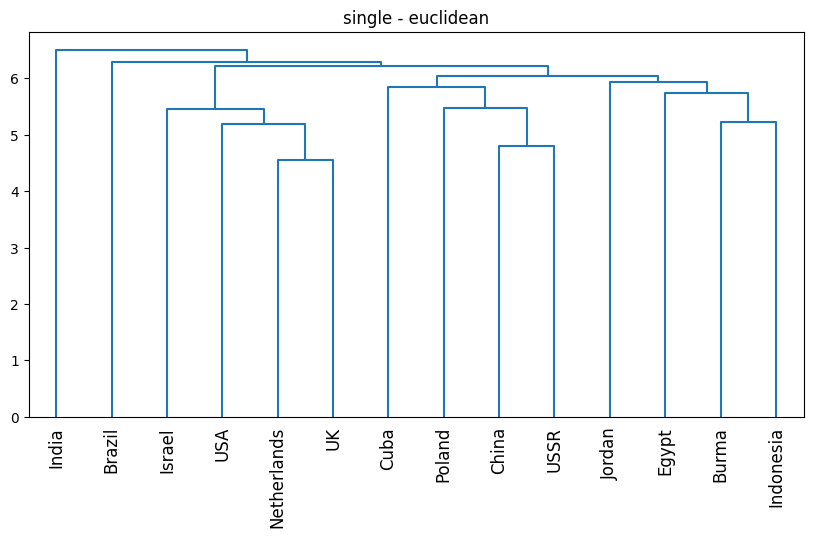

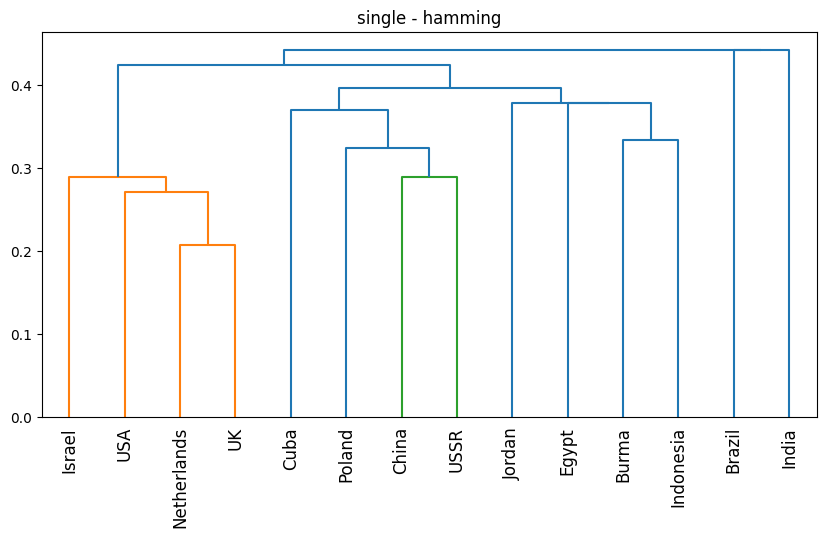

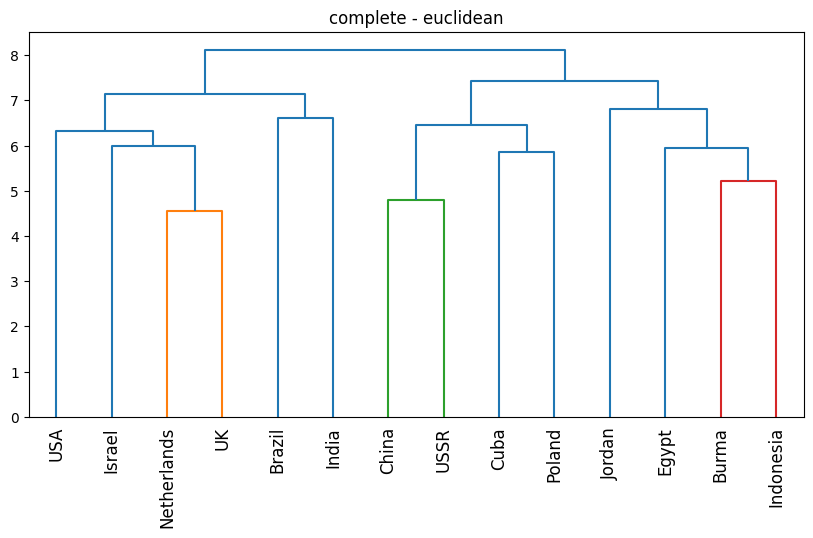

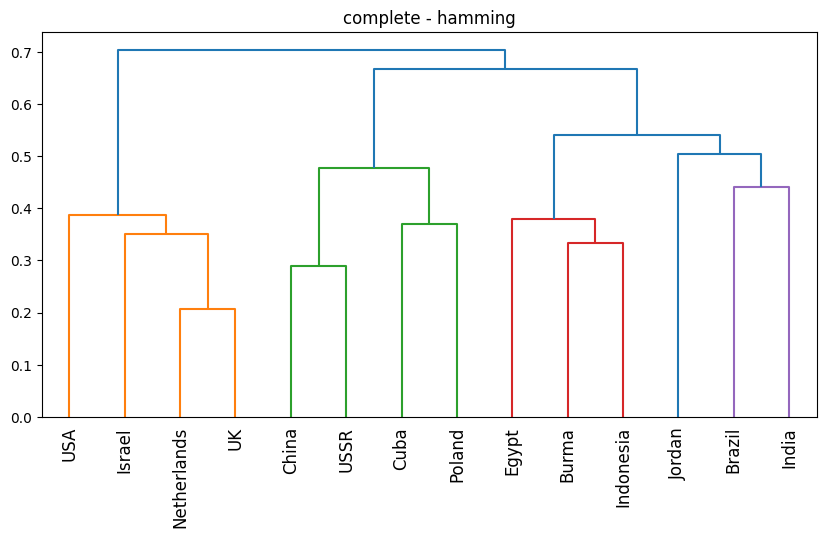

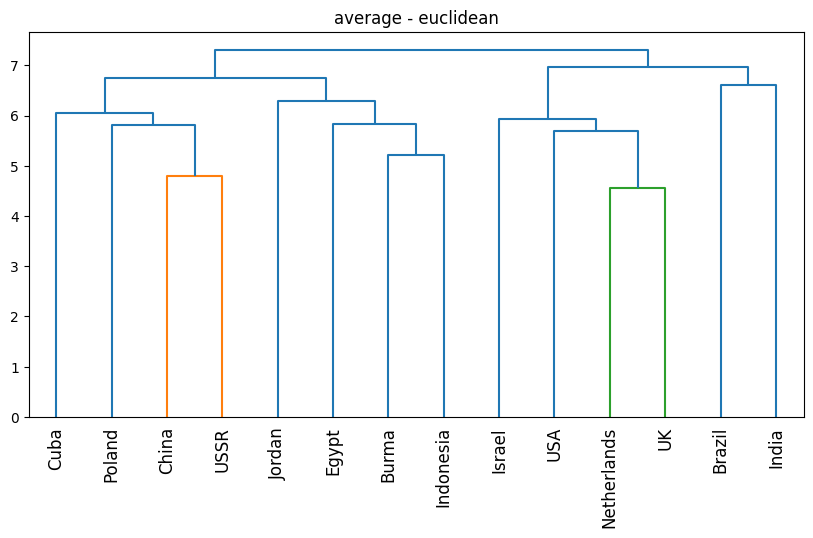

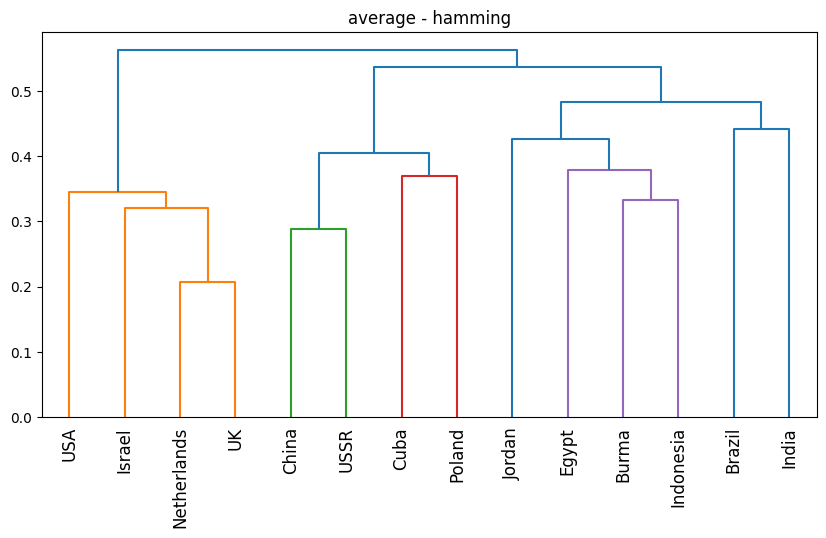

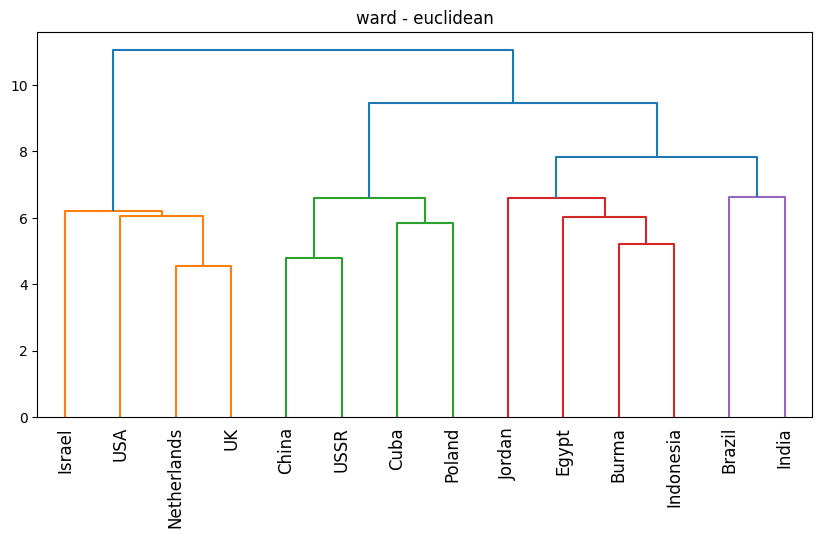

In [8]:
import os

X = pd.read_excel("countries_binary.xlsx")
X.set_index(X.columns[0], inplace=True)

output_dir = "ejercicio3"
os.makedirs(output_dir, exist_ok=True)

def plot_dendro(X, method, metric):
    D = pdist(X, metric=metric)
    Z = linkage(D, method=method)

    plt.figure(figsize=(10, 5))
    dendrogram(Z, labels=X.index, leaf_rotation=90)
    plt.title(f"{method} - {metric}")

    # Nombre del archivo
    filename = f"{method}_{metric}.png"
    filepath = os.path.join(output_dir, filename)

    plt.savefig(filepath, bbox_inches="tight")
    plt.show()
    plt.close()

methods = ["single", "complete", "average", "ward"]
metrics = ["euclidean", "hamming"]

for m in methods:
    for metric in metrics:
        if m == "ward" and metric != "euclidean":
            continue
        plot_dendro(X, m, metric)

En los dendrogramas obtenidos se observa cómo los países se agrupan según sus características binarias, dependiendo del método de enlace y la métrica de distancia utilizada. Con el método single linkage se forman cadenas largas, mostrando el efecto de encadenamiento, donde países se agregan progresivamente a un mismo clúster. En contraste, complete linkage produce grupos más compactos y bien separados, mientras que average linkage genera una estructura intermedia entre ambos. El método de Ward muestra clústeres más balanceados, ya que minimiza la varianza interna, produciendo particiones más homogéneas. Respecto a las métricas, la distancia de Hamming, al ser adecuada para datos binarios, produce agrupamientos más interpretables y con separaciones más claras entre países con patrones similares, mientras que la distancia euclideana puede suavizar diferencias binarias. En general, se identifican grupos de países con patrones similares de características, evidenciando la influencia del método de enlace y la métrica en la estructura jerárquica resultante.

# **Ejercicio 4**

In [15]:

from sklearn.preprocessing import StandardScaler

X = pd.read_excel("countries_binary.xlsx")
X.set_index(X.columns[0], inplace=True)


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)




### Método del codo para justificar 4

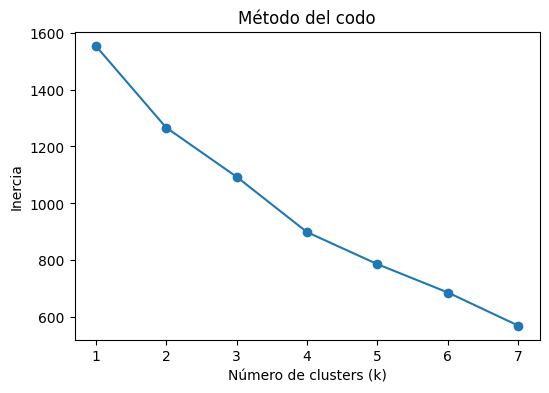

In [14]:
inertia = []
K = range(1, 8)

for k in K:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K, inertia, marker="o")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Inercia")
plt.title("Método del codo")
plt.show()


Se puede observar que 4 es la mejor opción para k.

In [17]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)

labels = kmeans.fit_predict(X_scaled)


X_kmeans = X.copy()
X_kmeans["Cluster"] = labels

print(X_kmeans.sort_values("Cluster"))


             telephone  agriculturarl_pop  energy_consume  illiterates  GNP  \
Country                                                                       
Brazil               0                  1               0            1    0   
India                0                  1               0            1    0   
Cuba                 0                  0               0            0    0   
China                0                  1               0            1    0   
Poland               0                  0               1            0    1   
USSR                 0                  0               1            0    1   
Burma                0                  1               0            1    0   
Egypt                0                  1               0            1    0   
Jordan               0                  0               0            1    0   
Indonesia            0                  1               0            1    0   
Israel               1                  0           

**Comparación con el ejercicio anterior**

Las agrupaciones obtenidas mediante *k-means* no son exactamente iguales a las del análisis jerárquico, aunque muestran patrones generales similares. En ambos casos se identifican grupos de países desarrollados (Estados Unidos, Reino Unido, Israel y Países Bajos), países con economías planificadas o transicionales (URSS, Polonia, China y Cuba) y países en desarrollo (Egipto, India, Brasil, Indonesia y Jordania). Las diferencias se deben a que *k-means* requiere fijar previamente el número de clusters y asigna los países minimizando la varianza respecto a centroides con distancia euclídea, lo cual es menos adecuado para datos binarios que los métodos jerárquicos con distancia de Hamming. Por ello, aunque la estructura global es similar, las asignaciones individuales no coinciden completamente.


# **Ejercicio 5**

### Inciso A) Explicar lo siguiente: ¿Por que k-means falla con formas de “luna” o anillos concéntricos?

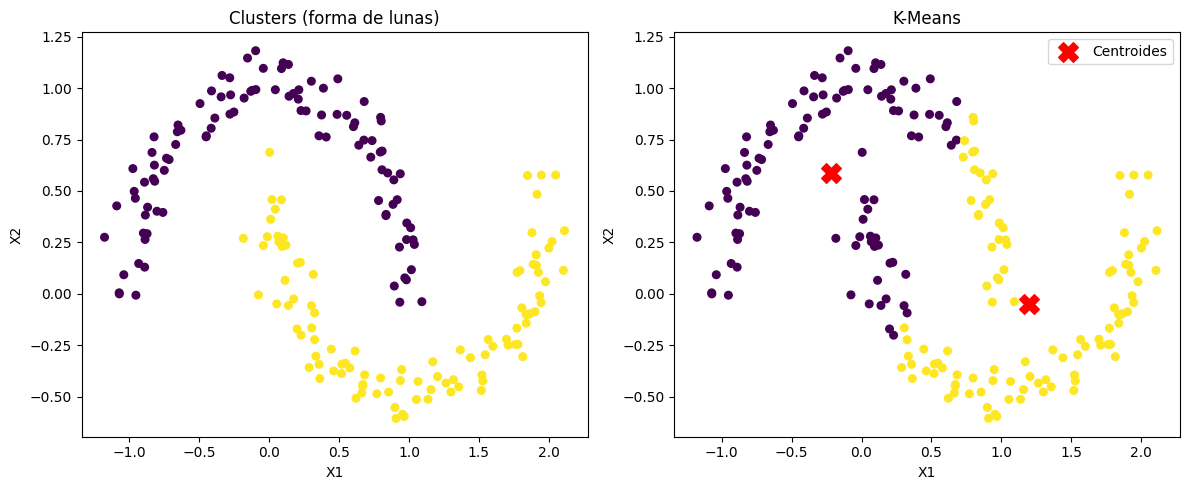

In [ ]:
X, y_true = make_moons(n_samples=200, noise=0.08, random_state=42)

# Aplicar K-Means con k = 2
kmeans = KMeans(n_clusters=2, random_state=42)
y_kmeans = kmeans.fit_predict(X)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y_true, cmap='viridis', s=30)
plt.title("Clusters (forma de lunas)")
plt.xlabel("X1")
plt.ylabel("X2")

# Resultado K-Means
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', s=30)
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    c='red',
    marker='X',
    s=200,
    label='Centroides'
)
plt.title("K-Means")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()

plt.tight_layout()
plt.show()

Se observa que los clústeres identificados no coinciden con la estructura real de los datos. En lugar de separar cada forma curva como un grupo independiente, el algoritmo divide el espacio en regiones aproximadamente lineales, lo que provoca que cada clúster contenga puntos pertenecientes a ambas lunas. Esta partición no respeta la forma natural de los datos y genera una separación artificial. La causa principal de esto es que K-Means agrupa los puntos únicamente en función de su cercanía a un centro representativo. Este criterio funciona adecuadamente cuando los clústeres son compactos y de forma convexa, pero falla cuando la distribución presenta estructuras curvas o no lineales. En este caso, puntos que pertenecen al mismo grupo pueden estar alejados entre sí, mientras que puntos de diferentes grupos pueden encontrarse más próximos, lo que conduce a errores en la agrupación.


### Inciso B)  Comparar k-means vs. agrupamiento jerarquico. ¿Cual produce mejores resultados? ¿Por que? ¿Cual es el metodo y la metrica que funcionan mejor en el agrupamiento jerarquico?

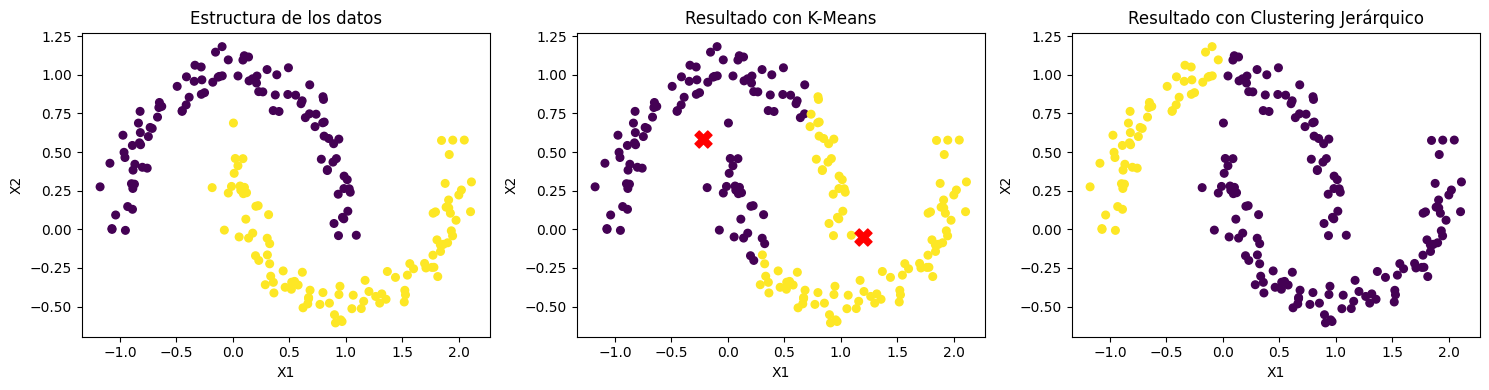

In [ ]:
X, y_true = make_moons(n_samples=200, noise=0.08, random_state=42)

# K-Means
kmeans = KMeans(n_clusters=2, random_state=42)
labels_kmeans = kmeans.fit_predict(X)

# Agrupamiento jerárquico
hierarchical = AgglomerativeClustering(
    n_clusters=2,
    linkage='complete',
    metric='euclidean'
)
labels_hierarchical = hierarchical.fit_predict(X)

plt.figure(figsize=(15, 4))

# Gráficas
plt.subplot(1, 3, 1)
plt.scatter(X[:, 0], X[:, 1], c=y_true, cmap='viridis', s=30)
plt.title("Estructura de los datos")
plt.xlabel("X1")
plt.ylabel("X2")

plt.subplot(1, 3, 2)
plt.scatter(X[:, 0], X[:, 1], c=labels_kmeans, cmap='viridis', s=30)
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    c='red',
    marker='X',
    s=150
)
plt.title("Resultado con K-Means")
plt.xlabel("X1")
plt.ylabel("X2")

plt.subplot(1, 3, 3)
plt.scatter(X[:, 0], X[:, 1], c=labels_hierarchical, cmap='viridis', s=30)
plt.title("Resultado con Clustering Jerárquico")
plt.xlabel("X1")
plt.ylabel("X2")

plt.tight_layout()
plt.show()


El agrupamiento jerárquico produce mejores resultados que K-Means, ya que logra separar los datos respetando la forma curva de los clústeres observados. Esto ocurre porque no depende de centroides ni de divisiones lineales del espacio, sino de la similitud entre puntos o grupos completos. En contraste, K-Means falla al forzar agrupaciones compactas que no reflejan la estructura real de los datos. Dentro del agrupamiento jerárquico, el método de enlace completo ofrece una separación más consistente al evitar unir grupos lejanos de forma prematura. La distancia euclidiana resulta adecuada en este caso, ya que preserva correctamente la proximidad geométrica entre los puntos. Cabe resaltar que el agrupamiento jerárquico tampoco es perfecto, aun así, el resultado obtenido es visualmente más coherente con la distribución original de los datos.

# **Ejercicio 6**

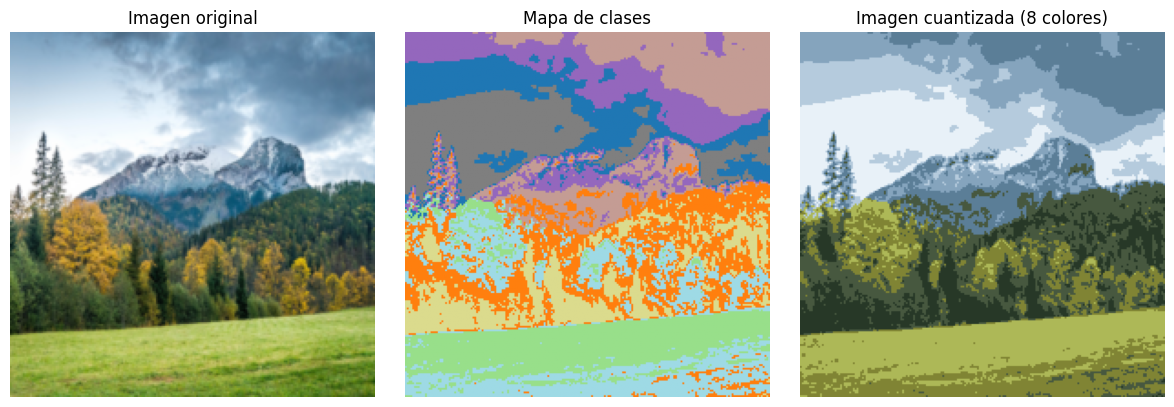

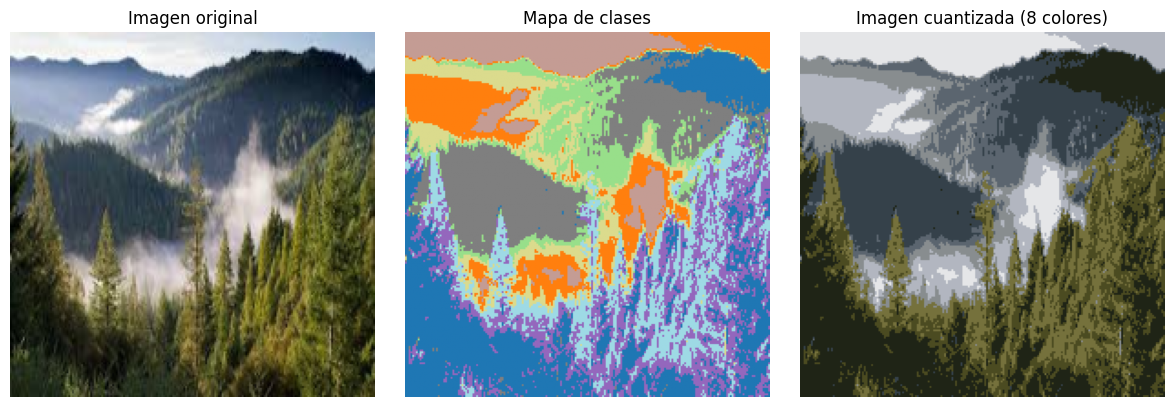

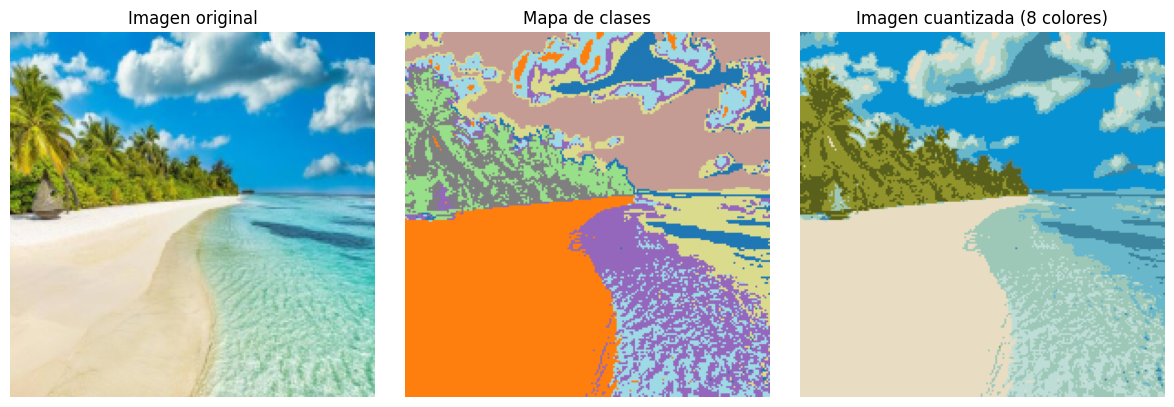

In [ ]:
def color_quantization(image_path, n_colors=8, img_size=(200, 200)):

    img = io.imread(image_path)

    if img.ndim == 2:
        img = np.stack([img]*3, axis=-1)
    if img.shape[2] == 4:
        img = img[:, :, :3]

    img = resize(img, img_size, anti_aliasing=True)

    pixels = img.reshape(-1, 3)

    # K-Means
    kmeans = KMeans(n_clusters=n_colors, random_state=42)
    labels = kmeans.fit_predict(pixels)
    centers = kmeans.cluster_centers_

    # Imagen cuantizada
    quantized_pixels = centers[labels]
    quantized_img = quantized_pixels.reshape(img.shape)

    # Mapa de clases
    label_map = labels.reshape(img.shape[0], img.shape[1])

    # Visualización
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 3, 1)
    plt.imshow(img)
    plt.title("Imagen original")
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.imshow(label_map, cmap="tab20")
    plt.title("Mapa de clases")
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.imshow(quantized_img)
    plt.title(f"Imagen cuantizada ({n_colors} colores)")
    plt.axis("off")

    plt.tight_layout()
    plt.show()

color_quantization("imagen1.jpg", n_colors=8)
color_quantization("imagen2.jpeg", n_colors=8)
color_quantization("imagen3.jpg", n_colors=8)
